# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le chiffre d'affaire d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le chiffre d'affaire (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(97, 2)

Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le chiffre d'affaires (x1000).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
y = data[:, 1];

Text(0, 0.5, "Chiffre d'affaires x1000")

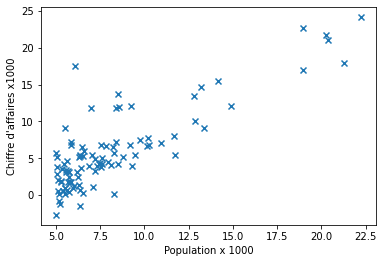

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCost(X, y, theta):
  y_pred = np.transpose(np.matmul(X,theta))
  m = len(y)
  J = (1 / 2*m) * (np.sum(y_pred - y)**2)
  return J

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)
  t = np.copy(theta)

  for i in range(iterations):
    y_pred = np.transpose(np.matmul(X,t))
    t[0] = t[0] - (alpha * ((1/m) * np.sum(y_pred - y)))
    t[1] = t[1] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,1])))
  return t

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.zeros((2, 1))

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
print("initialCost : {0}".format(initialCost))

initialCost : 15559020.291617688


# ***Appel des la fonction de calcul du gradient***

**Methode Decente du Gradiant (From Scratch)**

In [ ]:
# paramètres
iterations = 20000
alpha = 0.01
# Appel
theta = gradientDescent(X, y, theta, alpha, iterations)
print("Theta0 : {0}".format(theta[0]))
print("Theta1 : {0}".format(theta[1]))
print("cost initiale : {0} ,  cost finale : {1}".format(initialCost,computeCost(X, y, theta)))

Theta0 : [-3.89578088]
Theta1 : [1.19303364]
cost initiale : 15559020.291617688 ,  cost finale : 2.2489849495884083e-22


**Methode (sklearn Library)**

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept : (theta 0) \n', regr.intercept_)
print('Coefficients : (theta 1) \n', regr.coef_[1])

Intercept : (theta 0) 
 -3.8957808783118537
Coefficients : (theta 1) 
 1.1930336441895932


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

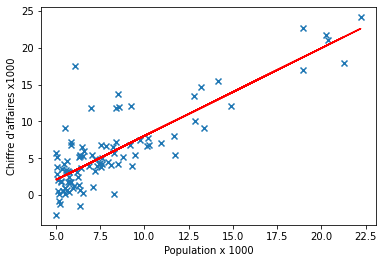

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X[:,1],y_pred,color='r')
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

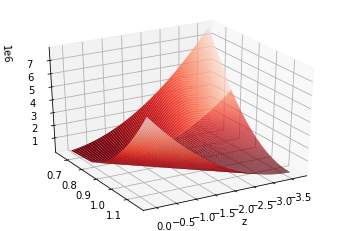

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d

# defining all 3 axes
nbIter = 1500
x_ = np.zeros((nbIter+1))
y_ = np.zeros((nbIter+1))

theta = np.zeros((2, 1))

for i in range(0,nbIter+1):
  x_[i] = (theta[0])
  y_[i] = (theta[1])
  theta = gradientDescent(X, y, theta, alpha, 1)

x_ = x_[1:len(x_)]
y_ = y_[1:len(y_)]

x_ = np.array([x_[i] for i in range(0,1500,5)])
y_ = np.array([y_[i] for i in range(0,1500,5)])

x_grid = np.zeros((x_.shape[0],x_.shape[0]))
y_grid = np.zeros((y_.shape[0],y_.shape[0]))
z_grid = np.zeros((y_.shape[0],y_.shape[0]))

for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    x_grid[i][j] = x_[i]
    y_grid[j][i] = y_[i]


for i in range(len(x_grid)):
  for j in range(len(x_grid)):
    z_grid[i][j] = computeCost(X, y, [ x_grid[i][j] ,  y_grid[i][j] ])

output = plt.subplot(111, projection = '3d')   # 3d projection
output.view_init(30, 60)
output.plot_surface(x_grid, y_grid, z_grid, rstride = 2, cstride = 2, cmap = plt.cm.Reds_r)
output.set_xlabel('x')                         # axis label
output.set_xlabel('y')
output.set_xlabel('z')
plt.show()

In [ ]:
# The function J
def J(theta0, theta1, x, y, m):
    J = 0
    for i in range(m):
        J += ((theta0 + theta1*x[i]) - y[i] )**2
    return J

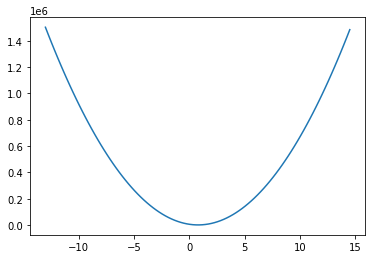

In [ ]:
a = np.linspace(-13,14.5,100)
plt.plot(a, J(0.1,a,X[:,1],y,m=len(X)) ) 

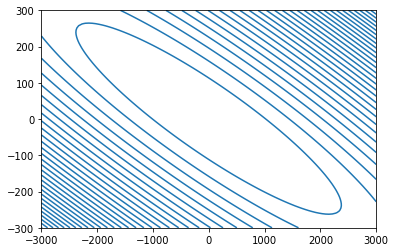

In [ ]:
a0 = np.linspace(-3000,3000, 100)
a1 = np.linspace(-300,300, 100)
aa0, aa1 = np.meshgrid(a0, a1)
plt.contour(aa0,aa1,0.00000001*J(aa0,aa1,X[:,1],y,m=len(X)) , colors='C0', levels=[i for i in np.arange(0,800,1)])

Prédire des valeurs de x

In [ ]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta);
predict1

array([0.45166649])

In [ ]:
predict2 = np.matmul([1, 7],theta);
predict2

array([4.53410299])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape

(47, 3)

Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,0:2]))
X = np.array(X,dtype = np.int)
y = dataMulti[:, 2]
theta = np.zeros((3, 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
initialCost=computeCost(X, y, theta)
print("initialCost : {0}".format(initialCost))

initialCost : 6015548808460000.0


In [ ]:
# pas besoin de redéfinir la fonction de coût

Mise à l'échelle des données

In [ ]:
X_scaled = np.ones(X.shape)
max1 = X[:,1].max()
max2 = X[:,2].max()
min1 = X[:,1].min()
min2 = X[:,2].min()

for i in range(len(X)):
  X_scaled[i][1] = (X[i][1]-min1)/(max1-min1) 
  X_scaled[i][2] = (X[i][2]-min2)/(max2-min2) 

print("mise a l'echelle de X")
print(X_scaled)

y_scaled = np.zeros(y.shape)
max3 = y.max()
min3 = y.min()

for i in range(len(y)):
  y_scaled[i] = (y[i]-min3)/(max3-min3) 

print("mise a l'echelle de Y")
print(y_scaled)

mise a l'echelle de X
[[1.         0.34528406 0.5       ]
 [1.         0.20628792 0.5       ]
 [1.         0.42691671 0.5       ]
 [1.         0.1555433  0.25      ]
 [1.         0.59238831 0.75      ]
 [1.         0.31246553 0.75      ]
 [1.         0.18808605 0.5       ]
 [1.         0.15857694 0.5       ]
 [1.         0.145615   0.5       ]
 [1.         0.17705461 0.5       ]
 [1.         0.30005516 0.75      ]
 [1.         0.31660232 0.5       ]
 [1.         0.28626586 0.5       ]
 [1.         1.         1.        ]
 [1.         0.11472697 0.5       ]
 [1.         0.39933811 0.75      ]
 [1.         0.12906784 0.25      ]
 [1.         0.10590182 0.5       ]
 [1.         0.48455598 0.75      ]
 [1.         0.60093767 0.75      ]
 [1.         0.25234418 0.5       ]
 [1.         0.28571429 0.25      ]
 [1.         0.20739106 0.5       ]
 [1.         0.30612245 0.75      ]
 [1.         0.83783784 0.5       ]
 [1.         0.06839493 0.5       ]
 [1.         0.16712631 0.5       ]
 [1.  

Normalisation des données en moyenne = 0

In [ ]:
mean_ = np.mean(X_scaled)
std_ = np.std(X_scaled)
X_scaled_normalized = np.array([ [ 1 , ((i-mean_)/std_)[0] , ((i-mean_)/std_)[1] ] for i in X_scaled[:,1:3]])
X_scaled_normalized = np.array(X_scaled_normalized)

mean_ = np.mean(y_scaled)
std_ = np.std(y_scaled)
y_scaled_normalized = [(i-mean_)/std_ for i in y_scaled]
y_scaled_normalized = np.array(y_scaled_normalized)

print("normalisatio de X")
print(X_scaled_normalized)
print()
print("normalisatio de Y")
print(y_scaled_normalized)

normalisatio de X
[[ 1.         -0.83427726 -0.36404999]
 [ 1.         -1.25672742 -0.36404999]
 [ 1.         -0.5861716  -0.36404999]
 [ 1.         -1.41095526 -1.12387355]
 [ 1.         -0.08325474  0.39577358]
 [ 1.         -0.93402243  0.39577358]
 [ 1.         -1.31204828 -0.36404999]
 [ 1.         -1.40173512 -0.36404999]
 [ 1.         -1.44113027 -0.36404999]
 [ 1.         -1.34557607 -0.36404999]
 [ 1.         -0.9717412   0.39577358]
 [ 1.         -0.92144951 -0.36404999]
 [ 1.         -1.01365094 -0.36404999]
 [ 1.          1.15559714  1.15559714]
 [ 1.         -1.53500809 -0.36404999]
 [ 1.         -0.66999108  0.39577358]
 [ 1.         -1.49142196 -1.12387355]
 [ 1.         -1.56183032 -0.36404999]
 [ 1.         -0.41098889  0.39577358]
 [ 1.         -0.0572707   0.39577358]
 [ 1.         -1.1167489  -0.36404999]
 [ 1.         -1.01532733 -1.12387355]
 [ 1.         -1.25337464 -0.36404999]
 [ 1.         -0.95330091  0.39577358]
 [ 1.          0.66273861 -0.36404999]
 [ 1.  

#***Appliquer la descente du gradient à plusieurs variables***


**Methode Decente du Gradiant plusieurs variables (From Scratch)**

In [ ]:
import datetime

theta = np.zeros((3, 1))

def gradientDescent_multi(X, y, theta, alpha, iterations):
  m = len(y)
  t = np.copy(theta)

  for i in range(iterations):
    y_pred = np.transpose(np.matmul(X,t))
    t[0] = t[0] - (alpha * ((1/m) * np.sum(y_pred - y)))
    t[1] = t[1] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,1])))
    t[2] = t[2] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,2])))
  return t


a = datetime.datetime.now().replace(microsecond=0)
t = gradientDescent_multi(X_scaled_normalized, y_scaled_normalized, theta, 0.01, 4500)
print("Theta0 : {0}".format(t[0]))
print("Theta1 : {0}".format(t[1]))
print("Theta2 : {0}".format(t[2]))
b = datetime.datetime.now().replace(microsecond=0)
tempNorm = b - a

err = computeCost(X_scaled_normalized, y_scaled_normalized,t)
print("cost finale : {0}".format(err))

Theta0 : [1.212694]
Theta1 : [1.34028539]
Theta2 : [-0.09073849]
cost finale : 0.003204533751473987


***Methode plusieurs variables (sklern Library)***

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_scaled_normalized[:,1:3], y_scaled_normalized)

print('Intercept : (theta 0) ', regr.intercept_)
print('Coefficients : (theta 1) ', regr.coef_[0])
print('Coefficients : (theta 2) ', regr.coef_[1])

Intercept : (theta 0)  1.2145576752909204
Coefficients : (theta 1)  1.342606730102359
Coefficients : (theta 2)  -0.09296434947007005


In [ ]:
print("temps pris (avec variables normalisee) : {0}".format(tempNorm))

temps pris (avec variables normalisee) : 0:00:00


In [321]:
import datetime

theta = np.zeros((3, 1)) # initialement a 0

def gradientDescent_multi_test(X, y, theta, alpha, iterations):
  a = datetime.datetime.now().replace(microsecond=0)
  m = len(y)
  t = np.copy(theta)

  for i in range(iterations):
    if (i%1000000 == 0):
      b = datetime.datetime.now().replace(microsecond=0)
      print("iter {0} , cost : {1} , t : [{2},{3},{4}] , temps pris : {5}".format(i,computeCost(X, y,t),t[0][0],t[1][0],t[2][0],(b-a)))
    y_pred = np.transpose(np.matmul(X,t))
    t[0] = t[0] - (alpha * ((1/m) * np.sum(y_pred - y)))
    t[1] = t[1] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,1])))
    t[2] = t[2] - (alpha * ((1/m) * np.sum((y_pred - y) * X[:,2])))

  print("temps pris (sans normalisation) : {0}".format(b-a))
  return t

gradientDescent_multi_test(X, y, theta, 0.0000004328, 300000000)

iter 0 , cost : 6015548808460000.0 , t : [0.0,0.0,0.0] , temps pris : 0:00:00
iter 1000000 , cost : 2888226946933.582 , t : [3644.3608433536265,155.63526951472596,5656.669426300377] , temps pris : 0:00:39
iter 2000000 , cost : 1943653179296.7524 , t : [6561.840331968702,149.4824189946344,9042.091091127733] , temps pris : 0:01:17
iter 3000000 , cost : 1427115493750.943 , t : [9007.456834284058,145.5993859364839,10997.428898090404] , temps pris : 0:01:56
iter 4000000 , cost : 1127918832886.991 , t : [11142.463565935193,143.14954796435944,12053.589112841315] , temps pris : 0:02:35
iter 5000000 , cost : 944514590622.44 , t : [13068.946806604858,141.6046346000072,12545.723483654696] , temps pris : 0:03:13
iter 6000000 , cost : 825558185108.9861 , t : [14851.627278345915,140.6310790639329,12685.379482443506] , temps pris : 0:03:52
iter 7000000 , cost : 743855736513.5884 , t : [16531.626383100564,140.01825699578,12606.058348650371] , temps pris : 0:04:31
iter 8000000 , cost : 684398458445.430

array([[89451.72930253],
       [  139.21013056],
       [-8693.78879307]])

# ***Comparer la descente du gradient avec et sans normalisation***
- **Exemple**: voir la difference dans le temps de calcul 

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [324]:
def gradientDescent_multi_test_alpha(X, y, theta, alpha, iterations):
  a = datetime.datetime.now().replace(microsecond=0)
  m = len(y)
  t = np.copy(theta)

  for i in range(iterations):
    if (i%100000 == 0):
      b = datetime.datetime.now().replace(microsecond=0)
      print("iter {0} , cost : {1} , t : [{2},{3},{4}] , temps pris : {5}".format(i,computeCost(X, y,t),t[0][0],t[1][0],t[2][0],(b-a)))
    y_pred = np.transpose(np.matmul(X,t))
    t[0] = t[0] - (alpha[0] * ((1/m) * np.sum(y_pred - y)))
    t[1] = t[1] - (alpha[1] * ((1/m) * np.sum((y_pred - y) * X[:,1])))
    t[2] = t[2] - (alpha[2] * ((1/m) * np.sum((y_pred - y) * X[:,2])))
  return t
a = datetime.datetime.now().replace(microsecond=0)
t = gradientDescent_multi_test_alpha(X, y, theta, [0.001,0.0000001,0.001], 1000000)
b = datetime.datetime.now().replace(microsecond=0)
print("temps pris : {0}".format(b-a))

iter 0 , cost : 6015548808460000.0 , t : [0.0,0.0,0.0] , temps pris : 0:00:00
iter 100000 , cost : 49443819.939814 , t : [88967.80408012208,139.2084575351048,-8547.563659159016] , temps pris : 0:00:04
iter 200000 , cost : 2746.4131352407953 , t : [89593.0709004592,139.2106184244585,-8736.496742217809] , temps pris : 0:00:08
iter 300000 , cost : 0.15255263386010978 , t : [89597.73096905177,139.21063452941124,-8737.90484688259] , temps pris : 0:00:12
iter 400000 , cost : 8.47368622905291e-06 , t : [89597.76570020692,139.21063464944032,-8737.915341385116] , temps pris : 0:00:16
iter 500000 , cost : 4.682983433810393e-10 , t : [89597.76595905368,139.21063465033336,-8737.915419598214] , temps pris : 0:00:21
iter 600000 , cost : 2.7472364593178304e-12 , t : [89597.76596085784,139.21063465034257,-8737.915420145458] , temps pris : 0:00:25
iter 700000 , cost : 2.7472364593178304e-12 , t : [89597.76596085784,139.21063465034257,-8737.915420145458] , temps pris : 0:00:29
iter 800000 , cost : 2.747

In [325]:
print(t)

[[89597.76596086]
 [  139.21063465]
 [-8737.91542015]]


In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X[:,1:3], y)

print('Intercept : (theta 0) ', regr.intercept_)
print('Coefficients : (theta 1) ', regr.coef_[0])
print('Coefficients : (theta 2) ', regr.coef_[1])

Intercept : (theta 0)  89597.76596099924
Coefficients : (theta 1)  139.2106346503416
Coefficients : (theta 2)  -8737.915420187152


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Mars 2022 à 22h


In [ ]:
# bonne chance